## LIPO Investigation

This is intended to be a place for investigations and experimentation with the LIPO algorithm outlined [here](https://arxiv.org/abs/1703.02628). Further ideas and more accessible description located [here](http://blog.dlib.net/2017/12/a-global-optimization-algorithm-worth.html).

To remind myself throughout this process, the rough idea is:

- we want to minimize a function $f$ that we are assuming is lipschitz continuous.
- we employ a sequential strategy where we use information about previous evaluations of $f$ to inform future evaluations.
- the main mechanism to do so is maintaining a lower bound on $f$ that looks like $U(x) = \max_{i=1,\dots, t}\big(f(x_i) - ||x-x_i||_2\big)$ (where $\{x_i\}_{i=1}^{t}$ are the points we have evaluated $f$ at)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

To start, we will implement a simple version of LIPO that minimizes a function $f: \mathbb{R}^d\to\mathbb{R}$ with a given lipshitz constant $k$ (ie we don't need to estimate it).

In [2]:
def U(x, pts, f, k):
    """
    Inputs:
      - x:   a d vector in R^d (d-dimensional vector space)
      - pts: a t x d array where columns are points that we have already evaluated f at
      - f:   the function from R^d -> R that we seek to maximize
      - k:   the lipschitz constant of f
    """
    
    f_pts = np.apply_along_axis(func1d=f, axis=0, arr=pts)
    diff = x.reshape(x.shape[0], 1) - pts
    kdiff = k * np.linalg.norm(diff, axis=0)
    return np.max(f_pts - kdiff)

We are going to use the following crude example to visualize what is going on at each stage of the process:

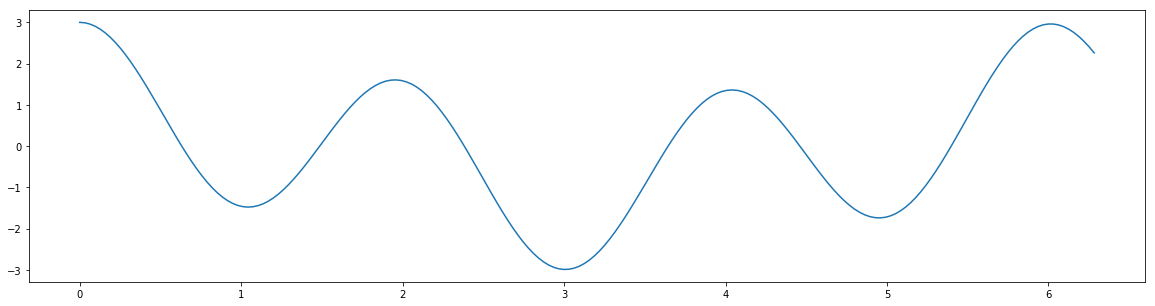

In [35]:
def f(x):
    return (np.cos(x) + 2*np.cos(np.pi*x))
grid = np.linspace(0,2*np.pi,200)
plt.figure(figsize=(20,5))
plt.plot(grid, f(grid))

In [4]:
# number of iterations to run
nIter = 100
# the fixed lipschitz constant to be used - I'm just guessing here
k = 10

# make an initial guess and add it to accepted points and all proposed points
initial_point = np.random.choice(grid)
pts = []
all_pts = []
pts.append(initial_point)
all_pts.append(initial_point)

# iterate through the procedure
for i in np.arange(nIter):
    
    # propose a new point and add to list of all proposed
    proposed_point = np.random.choice(grid)
    all_pts.append(proposed_point)
    
    # compute the value of the lower bound at proposed point
    cur_lower_bound = U(np.array([proposed_point]), np.array(pts)[None,:], f, k)
    
    # check if  value of lower bound at current proposal is less than observed minimum 
    if cur_lower_bound < np.min(f(np.array(pts))):
        # if it is, accept the point
        pts.append(proposed_point)

In [5]:
# compute the minimum as the accepted point that returns the minimum 
mini = np.array(pts)[np.argmin(f(np.array(pts)))]

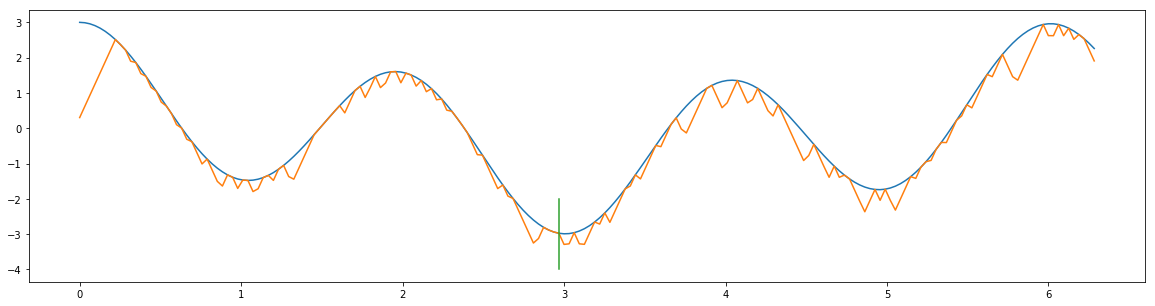

In [56]:
# plot our objective function
plt.figure(figsize=(20,5))
plt.plot(grid, f(grid))
# plot the lower bound
agrid = [U(np.array([g]), np.array(all_pts), f, k) for g in grid]
plt.plot(grid, agrid)
# plot the proposed minimum
plt.plot(np.ones(100)*mini,np.linspace(-4,-2,100))

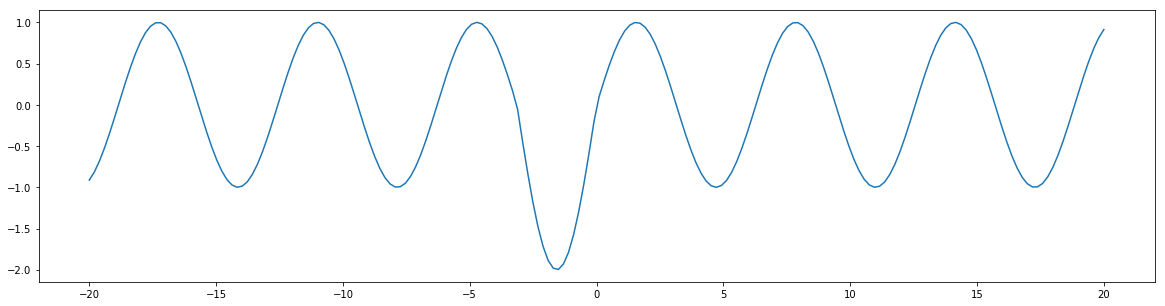

In [7]:
grid = np.linspace(-20,20,200)
def g(x):
    out = []
    for i in range(len(x)):
        if x[i] < 0 and x[i] > -np.pi:
            out.append(2*np.sin(x[i]))
        else:
            out.append(np.sin(x[i]))
    return out
plt.figure(figsize=(20,5))
plt.plot(grid, g(grid))

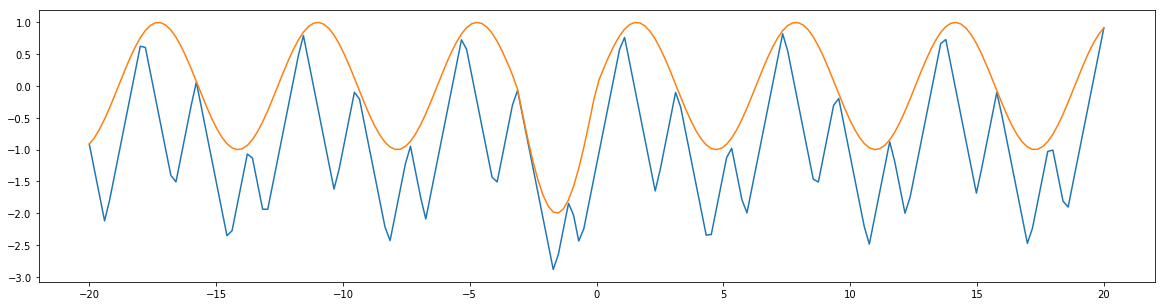

In [13]:
upper = lambda z: U(z, np.linspace(-20,20,20), g, 2)
plotit = np.apply_along_axis(upper, 0, grid[None,:])
plt.figure(figsize=(20,5))
plt.plot(grid, plotit)
plt.plot(grid, g(grid))

What have I missed?

- One of the biggest points of all this that I have not captured well is that the whole point of this procedure is to minimize a function $f$ that is _expensive_ to evaluate. As such, it would be nice to respect that spirit in the above demonstration of the procedure.
- Usually we don't know the lipschitz constant $k$ and have to estimate it. The links above point out that this is actually not too difficult but I have not done it.
- My code is probably disturbing to anyone who knows what they are doing.

Will address these in the next notebook.